In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
%matplotlib inline

In [3]:
#df = pd.read_csv('https://aineistot.liikennevirasto.fi/lam/rawdata/2018/[ELY]/lamraw_[lam_id]_[yearshort]_[day_number].csv')
df = pd.read_csv('cleaned_dataset.csv')

In [4]:
df.head(20)

,Mittauspiste,Sijainti,Päivä,Suuntakoodi,Ajoneuvoluokka,KLO_00-01,KLO_01-02,KLO_02-03,KLO_03-04,KLO_04-05,...,KLO_14-15,KLO_15-16,KLO_16-17,KLO_17-18,KLO_18-19,KLO_19-20,KLO_20-21,KLO_21-22,KLO_22-23,KLO_23-00
0,168,Askisto,2013/12/01,1,11 HA-PA,123.0,124.0,80.0,71.0,123.0,...,1288.0,1271.0,1210.0,1143.0,880.0,670.0,471.0,292.0,222.0,94.0
1,168,Askisto,2013/12/01,1,12 KAIP,2.0,1.0,1.0,1.0,0.0,...,13.0,12.0,13.0,8.0,5.0,8.0,3.0,5.0,1.0,8.0
2,168,Askisto,2013/12/01,1,13 Linja-autot,1.0,2.0,1.0,1.0,0.0,...,4.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0
3,168,Askisto,2013/12/01,1,14 KAPP,0.0,0.0,0.0,0.0,1.0,...,9.0,2.0,3.0,4.0,3.0,8.0,16.0,12.0,19.0,6.0
4,168,Askisto,2013/12/01,1,15 KATP,0.0,0.0,0.0,0.0,1.0,...,6.0,12.0,3.0,8.0,5.0,6.0,7.0,9.0,12.0,7.0
5,168,Askisto,2013/12/01,1,16 HA + PK,0.0,1.0,0.0,0.0,0.0,...,28.0,15.0,25.0,22.0,9.0,7.0,3.0,3.0,1.0,1.0
6,168,Askisto,2013/12/01,1,17 HA + AV,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
7,168,Askisto,2013/12/01,2,11 HA-PA,198.0,114.0,91.0,95.0,61.0,...,1201.0,1275.0,1265.0,1150.0,1059.0,786.0,664.0,388.0,212.0,211.0
8,168,Askisto,2013/12/01,2,12 KAIP,5.0,5.0,0.0,1.0,0.0,...,8.0,8.0,3.0,6.0,4.0,7.0,4.0,9.0,3.0,2.0
9,168,Askisto,2013/12/01,2,13 Linja-autot,3.0,2.0,1.0,1.0,0.0,...,3.0,1.0,1.0,2.0,2.0,1.0,2.0,4.0,3.0,2.0


In [5]:
def get_year(date_str):
    date = parser.parse(date_str, dayfirst=True)
    year = date.year
    return year

def get_weekday(date_str):
    date = parser.parse(date_str, dayfirst=True)
    weekday = date.weekday()
    return weekday

def get_week(date_str):
    date = parser.parse(date_str, dayfirst=True)
    week = date.isocalendar()[1]
    return week

def get_week_and_year(date_str):
    date = parser.parse(date_str, dayfirst=True)
    year = date.year
    week = date.isocalendar()[1]
    return "{}/{}".format(week, year)

def get_hour_cols():
    hour_cols = ["KLO_{:02}-{:02}".format(i, i+1) for i in range(24)]
    hour_cols[-1] = "KLO_23-00"
    return hour_cols

def is_midsummer(date_str):
    midsummers = [
        "2010/06/26",
        "2011/06/25",
        "2012/06/23",
        "2013/06/22",
        "2014/06/21",
        "2015/06/20",
        "2016/06/25",
        "2017/06/24",
        "2018/06/23",
    ]
    return date_str in midsummers
    

def get_sum(row):
    return row[get_hour_cols()].sum()
    s = 0
    for col in get_hour_cols():
        value = row[col]
        if isinstance(value, int):
            s += value
        elif isinstance(value, str) and value.isdigit():
            s += int(value)
    return s

In [6]:
# add calculated fields
df["Vuosi"] = df.Päivä.apply(get_year)
df["Viikonpäivä"] = df.Päivä.apply(get_weekday)
df["Viikko"] = df.Päivä.apply(get_week)
df["Viikko/vuosi"] = df.Päivä.apply(get_week_and_year)
df["Juhannuspäivä"] = df.Päivä.apply(is_midsummer)
df["SUM"] = df.apply(lambda row: get_sum(row), axis=1)

In [7]:
#df = df[(df.Ajoneuvoluokka == "11 HA-PA")]

In [8]:
df.head(20)
df.columns

Index(['Mittauspiste', 'Sijainti', 'Päivä', 'Suuntakoodi', 'Ajoneuvoluokka',
       'KLO_00-01', 'KLO_01-02', 'KLO_02-03', 'KLO_03-04', 'KLO_04-05',
       'KLO_05-06', 'KLO_06-07', 'KLO_07-08', 'KLO_08-09', 'KLO_09-10',
       'KLO_10-11', 'KLO_11-12', 'KLO_12-13', 'KLO_13-14', 'KLO_14-15',
       'KLO_15-16', 'KLO_16-17', 'KLO_17-18', 'KLO_18-19', 'KLO_19-20',
       'KLO_20-21', 'KLO_21-22', 'KLO_22-23', 'KLO_23-00', 'Vuosi',
       'Viikonpäivä', 'Viikko', 'Viikko/vuosi', 'Juhannuspäivä', 'SUM'],
      dtype='object')

In [9]:
#ha = df[(df.Ajoneuvoluokka == "11 HA-PA")]

In [10]:
#ha

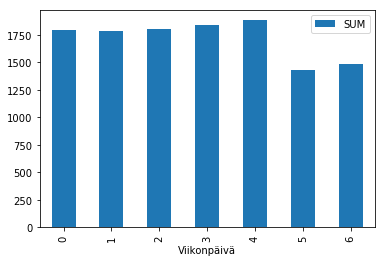

In [12]:
# average volume per weekday
avg_weekday = df[["Viikonpäivä", "SUM"]].groupby(["Viikonpäivä"]).agg('mean').reset_index()
avg_weekday.plot(x="Viikonpäivä", y="SUM", kind="bar")

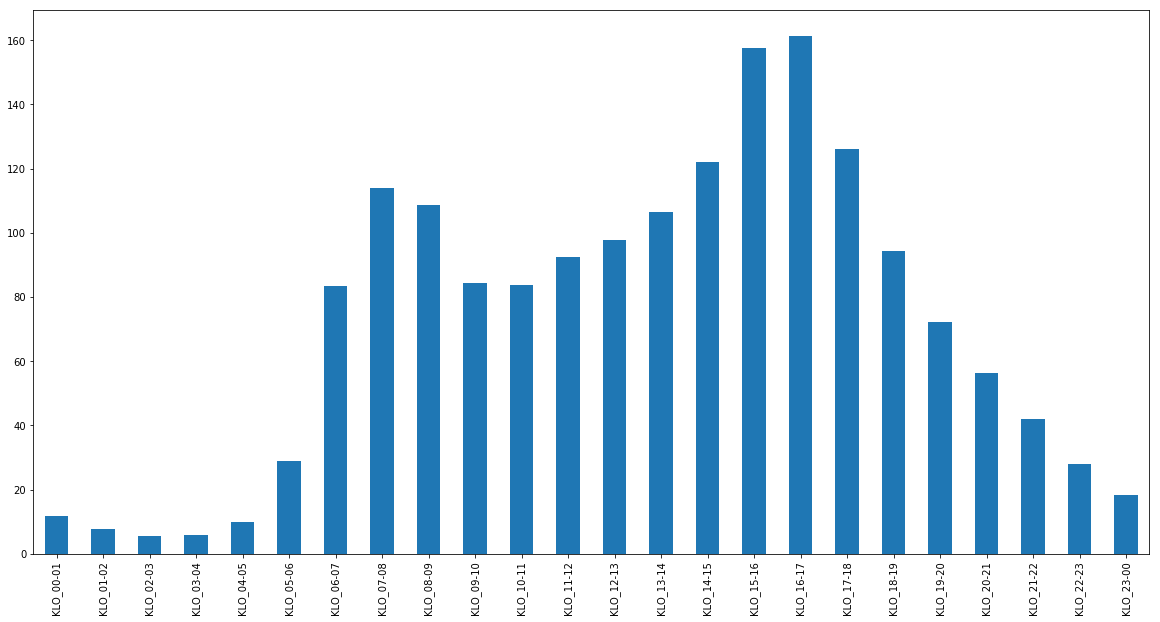

In [13]:
# average volume per clock time
fig, ax = plt.subplots(figsize=(20, 10))
avg_time = df[get_hour_cols()].mean(axis=0)
avg_time
avg_time.plot(kind="bar", ax=ax)

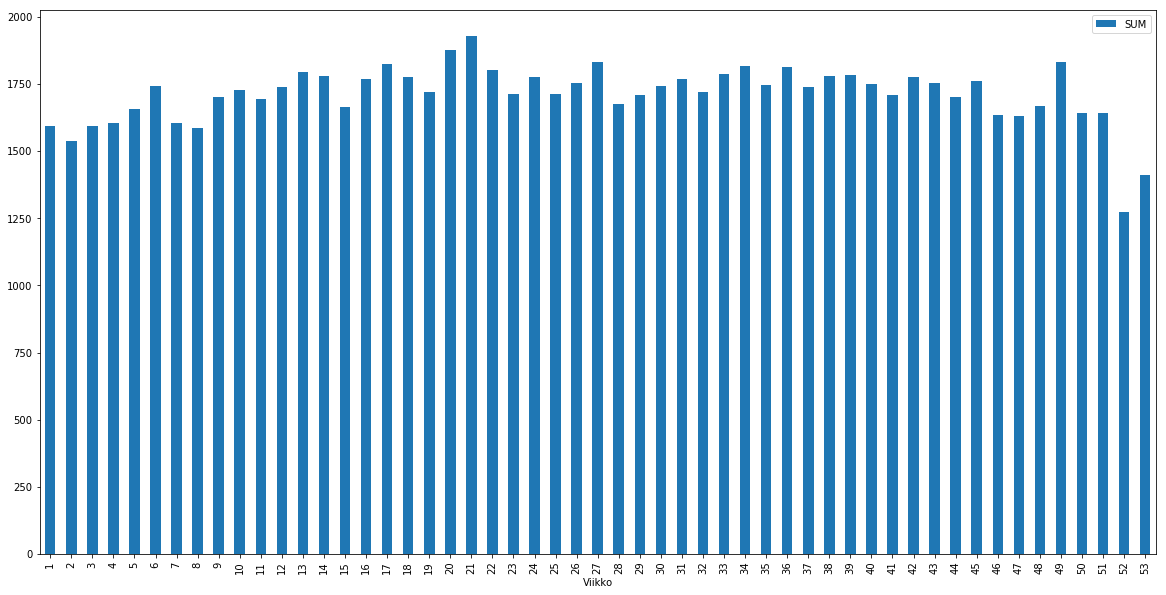

In [14]:
# average volume per week
fig, ax = plt.subplots(figsize=(20, 10))
avg_week = df[["Viikko", "SUM"]].groupby(["Viikko"]).agg('mean').reset_index()
avg_week.plot(x="Viikko", y="SUM", kind="bar", ax=ax)

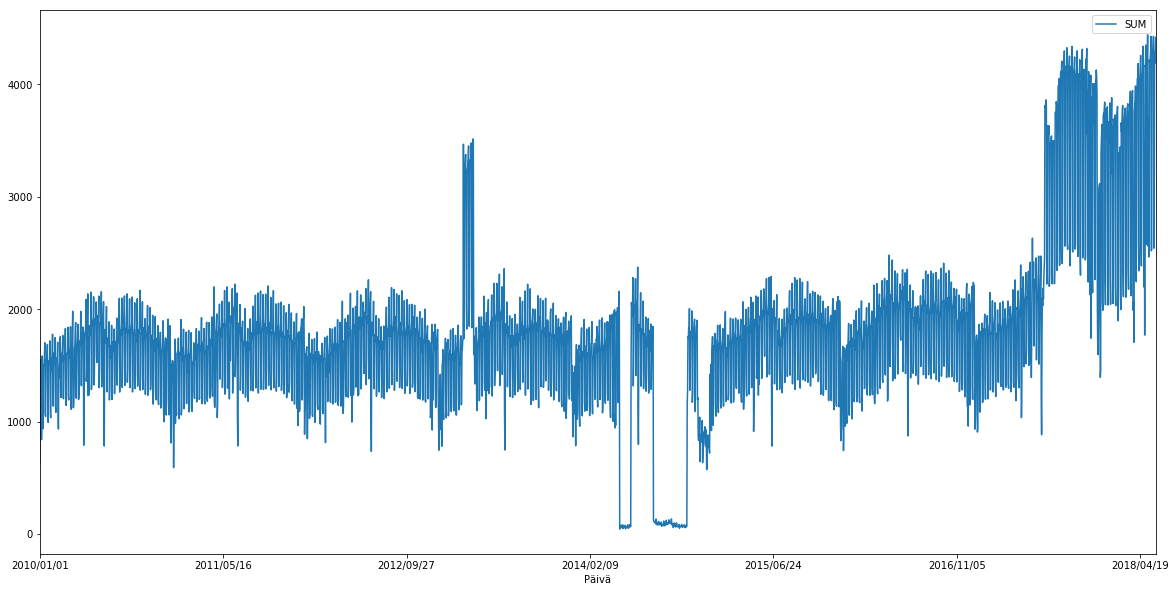

In [15]:
# average volume per date
fig, ax = plt.subplots(figsize=(20, 10))
avg_week = df[["Päivä", "SUM"]].groupby(["Päivä"]).agg('mean').reset_index()
avg_week.plot(x="Päivä", y="SUM", kind="line", ax=ax)

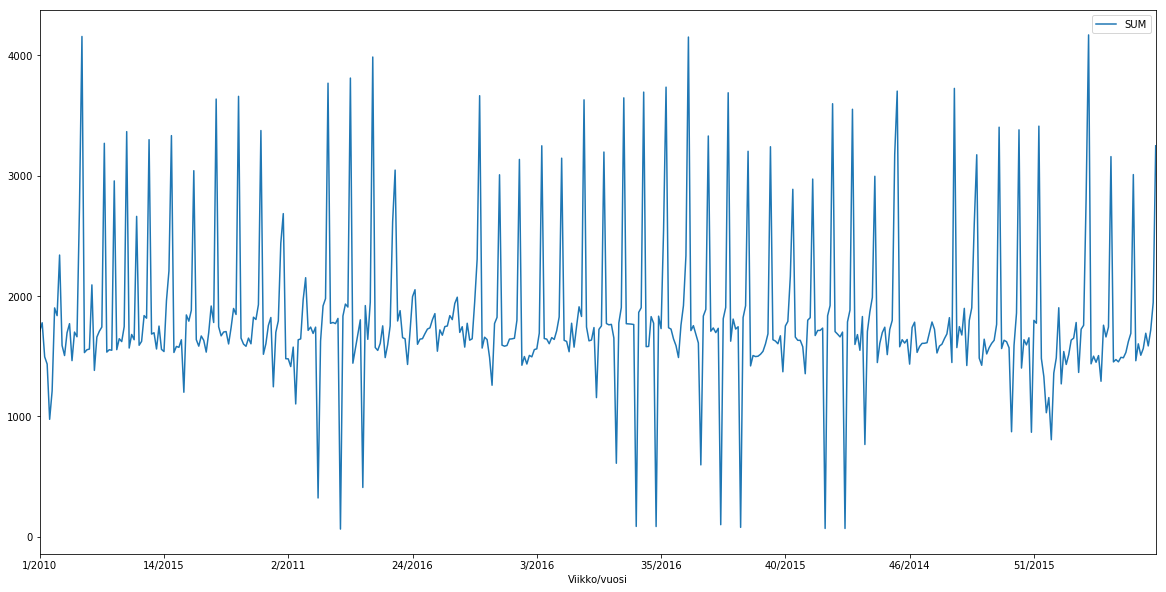

In [16]:
# average volume per week of a year
fig, ax = plt.subplots(figsize=(20, 10))
avg_week_year = df[["Viikko/vuosi", "SUM"]].groupby(["Viikko/vuosi"]).agg('mean').reset_index()
avg_week_year.plot(x="Viikko/vuosi", y="SUM", kind="line", ax=ax)

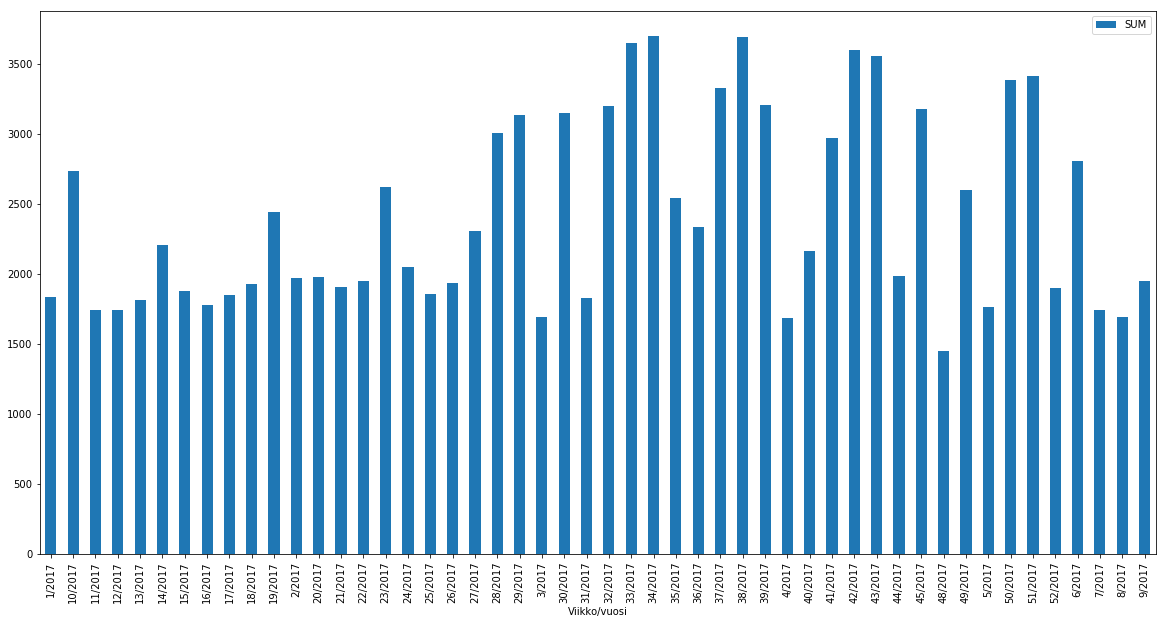

In [23]:
# average volume per week over the last full year (2017)
fig, ax = plt.subplots(figsize=(20, 10))
only_2017 = df[df["Vuosi"] == 2017]
avg_week_2017 = only_2017[["Viikko/vuosi", "SUM"]].groupby(["Viikko/vuosi"]).agg('mean').reset_index()
avg_week_2017.plot(x="Viikko/vuosi", y="SUM", kind="bar", ax=ax)

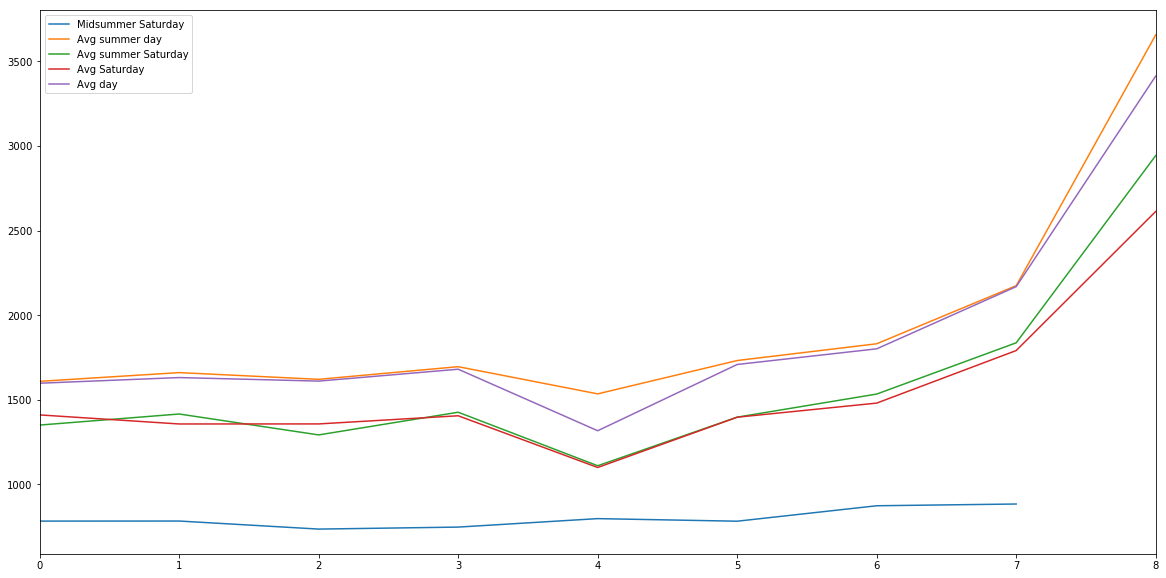

In [20]:
# investigate midsummer weekend vs. some average scenarios
fig, ax = plt.subplots(figsize=(20, 10))
midsummer_only = df[df["Juhannuspäivä"] == True]
sat_only = df[df["Viikonpäivä"] == 5]
summer_days_only = df[df["Viikko"].isin(range(22, 32))]
summer_sat_only = summer_days_only[summer_days_only["Viikonpäivä"] == 5]

avg_midsummer = midsummer_only[["Vuosi", "SUM"]].groupby(["Vuosi"]).agg("mean").reset_index()
avg_summer = summer_days_only[["Vuosi", "SUM"]].groupby(["Vuosi"]).agg("mean").reset_index()
avg_summer_sat = summer_sat_only[["Vuosi", "SUM"]].groupby(["Vuosi"]).agg("mean").reset_index()
avg_sat = sat_only[["Vuosi", "SUM"]].groupby(["Vuosi"]).agg("mean").reset_index()
avg_every = df[["Vuosi", "SUM"]].groupby(["Vuosi"]).agg("mean").reset_index()

averages = pd.concat([
        avg_midsummer["SUM"], 
        avg_summer["SUM"], 
        avg_summer_sat["SUM"], 
        avg_sat["SUM"], 
        avg_every["SUM"]
    ], axis=1)
averages.columns = ["Midsummer Saturday", "Avg summer day", "Avg summer Saturday", "Avg Saturday", "Avg day"]
averages.plot(ax=ax)

# ==> On midsummer Saturdays there seem to be significantly less traffic!